In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data by dividing pixel values by 255.
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the training data into training and cross-validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


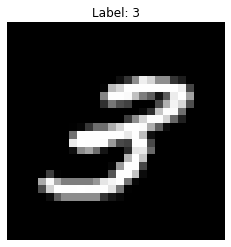

In [31]:
# Function to visualize a single digit image
def visualize_digit(image, title=None):
    plt.imshow(image, cmap='gray')
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Display an example from the training set
index = 5  # Select the index of the image you want to display
image = X_train[index]
label = np.argmax(y_train[index])

visualize_digit(image, title=f'Label: {label}')

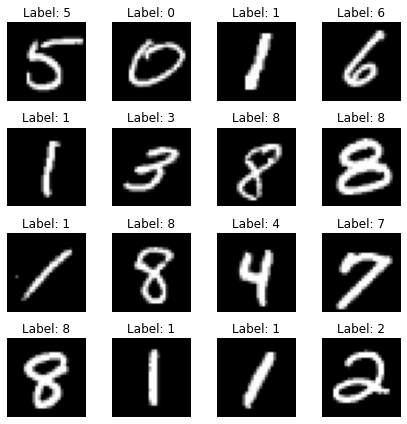

In [32]:
# Function to visualize a grid of digit images
def visualize_grid(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.5, rows * 1.5))
    for i in range(rows * cols):
        ax = axes[i // cols, i % cols]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f'Label: {np.argmax(labels[i])}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display a grid of images from the training set
rows = 4
cols = 4
start_index = 0
visualize_grid(X_train[start_index:start_index + rows * cols], y_train[start_index:start_index + rows * cols], rows, cols)

In [33]:
# Ensure that the input data has the correct shape (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               2

In [34]:
# Train the model
batch_size = 128
epochs = 10

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val, y_val)
)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Epoch 1/10
375/375 [==============================] - 33s 86ms/step - loss: 0.3438 - accuracy: 0.8938 - val_loss: 0.0807 - val_accuracy: 0.9760
Epoch 2/10
375/375 [==============================] - 33s 89ms/step - loss: 0.1103 - accuracy: 0.9676 - val_loss: 0.0594 - val_accuracy: 0.9820
Epoch 3/10
375/375 [==============================] - 31s 82ms/step - loss: 0.0786 - accuracy: 0.9763 - val_loss: 0.0490 - val_accuracy: 0.9851
Epoch 4/10
375/375 [==============================] - 31s 82ms/step - loss: 0.0656 - accuracy: 0.9803 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 5/10
375/375 [==============================] - 30s 79ms/step - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0388 - val_accuracy: 0.9893
Epoch 6/10
375/375 [==============================] - 31s 83ms/step - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 7/10
375/375 [==============================] - 29s 76ms/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.0353 - val_accuracy:

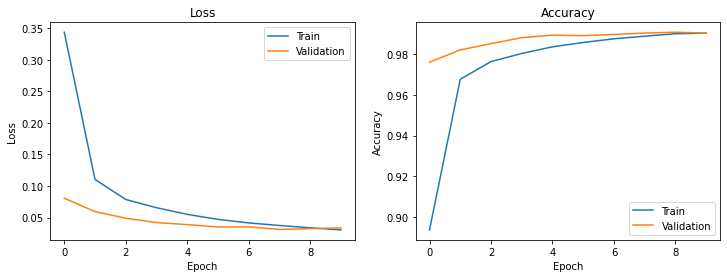

In [35]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot training and validation loss
    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot training and validation accuracy
    ax2.plot(history.history['accuracy'], label='Train')
    ax2.plot(history.history['val_accuracy'], label='Validation')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()

# Plot the training history
plot_history(history)

313/313 [==============================] - 2s 7ms/step


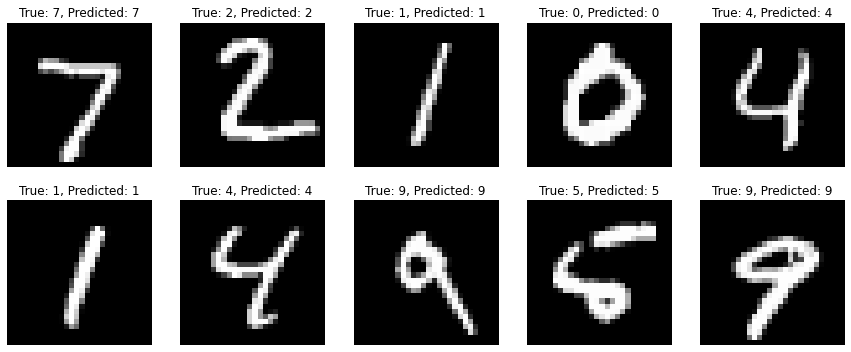

In [36]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to their original form
true_labels = np.argmax(y_test, axis=1)

# Visualize the first 10 predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    ax.axis('off')

plt.show()

In [38]:
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [39]:
import tf2onnx

# Convert the TensorFlow model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(model, opset=13)

# Save the ONNX model to a file
with open("mnist_cnn.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())